In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
import os
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [21]:
df = pd.read_csv("stud.csv")

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [24]:
df.shape

(1000, 8)

#### This means the dataset has 1000 rows and 8 columns

#### Checking missing values

In [25]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [26]:
#checking the dublicated values and found nothing
df.duplicated().sum()

0

In [27]:
#checking data types 
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [28]:
df.info()  # to check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [29]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [30]:
#count null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Renaming columns

In [31]:
#showing cols names
for col in df.columns:
    print(col)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


In [32]:
#renaming column names
df.columns = [col.title().replace(' ', '_') for col in df.columns]

In [33]:
df

,Gender,Race/Ethnicity,Parental_Level_Of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [34]:
#This shows the class distribution of students performance in math, reading and writing respectively

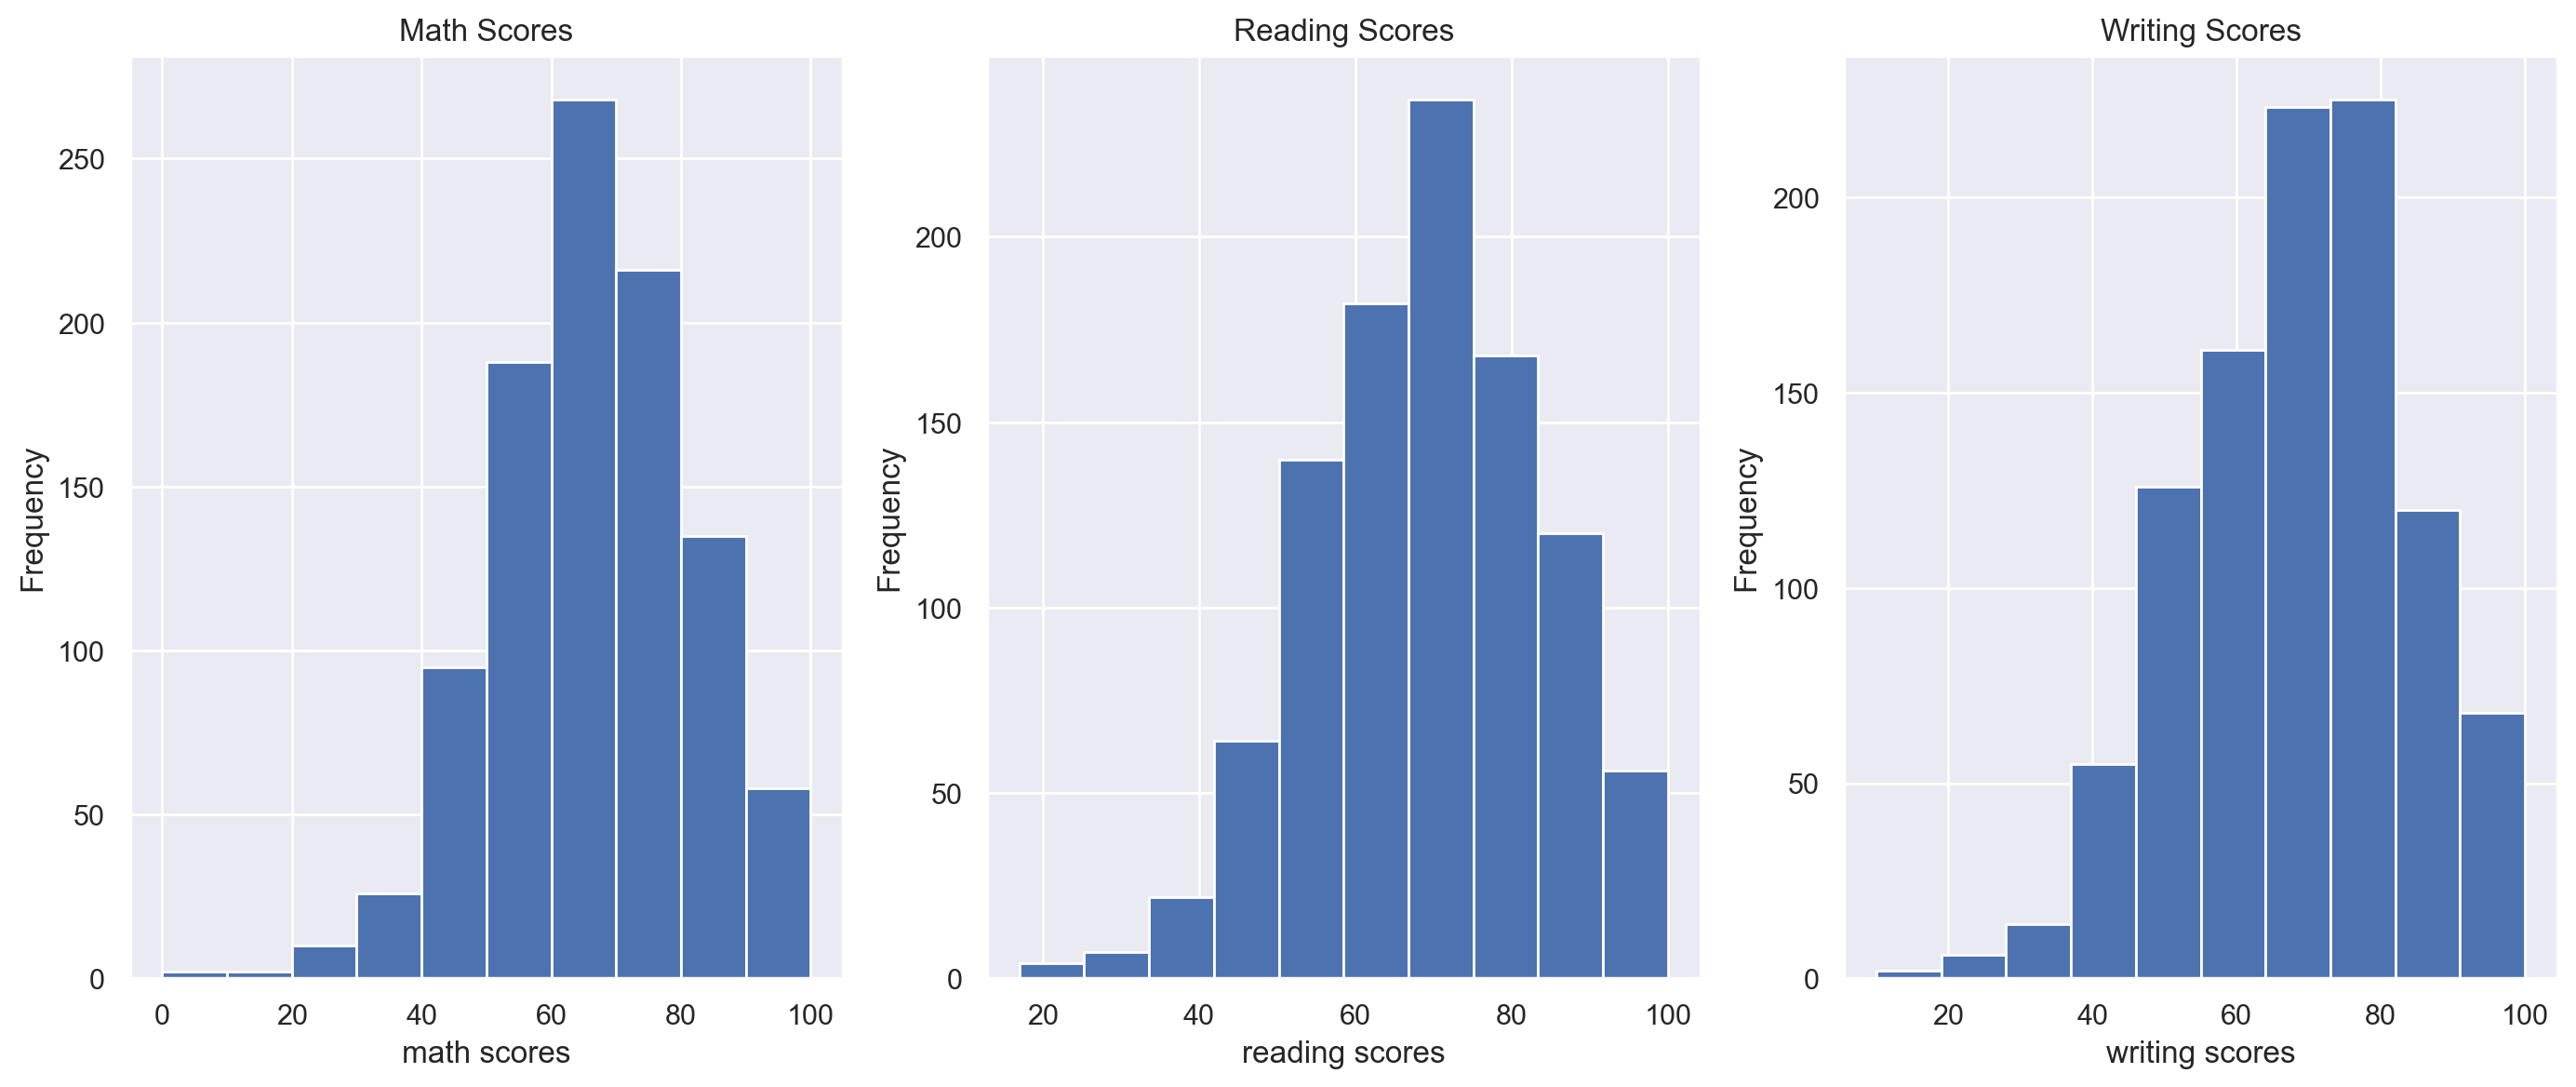

In [37]:
plt.figure(figsize=(14,6))

plt.subplot(1, 3, 1)
df['Math_Score'].plot(kind='hist')
plt.title('Math Scores')
plt.xlabel('math scores')
plt.tight_layout()


plt.subplot(1,3,2)
df['Reading_Score'].plot(kind='hist')
plt.title('Reading Scores')
plt.xlabel('reading scores')
plt.tight_layout()

plt.subplot(1,3,3)
df['Writing_Score'].plot(kind='hist')
plt.title('Writing Scores')
plt.xlabel('writing scores')
plt.tight_layout()

### Boxplot

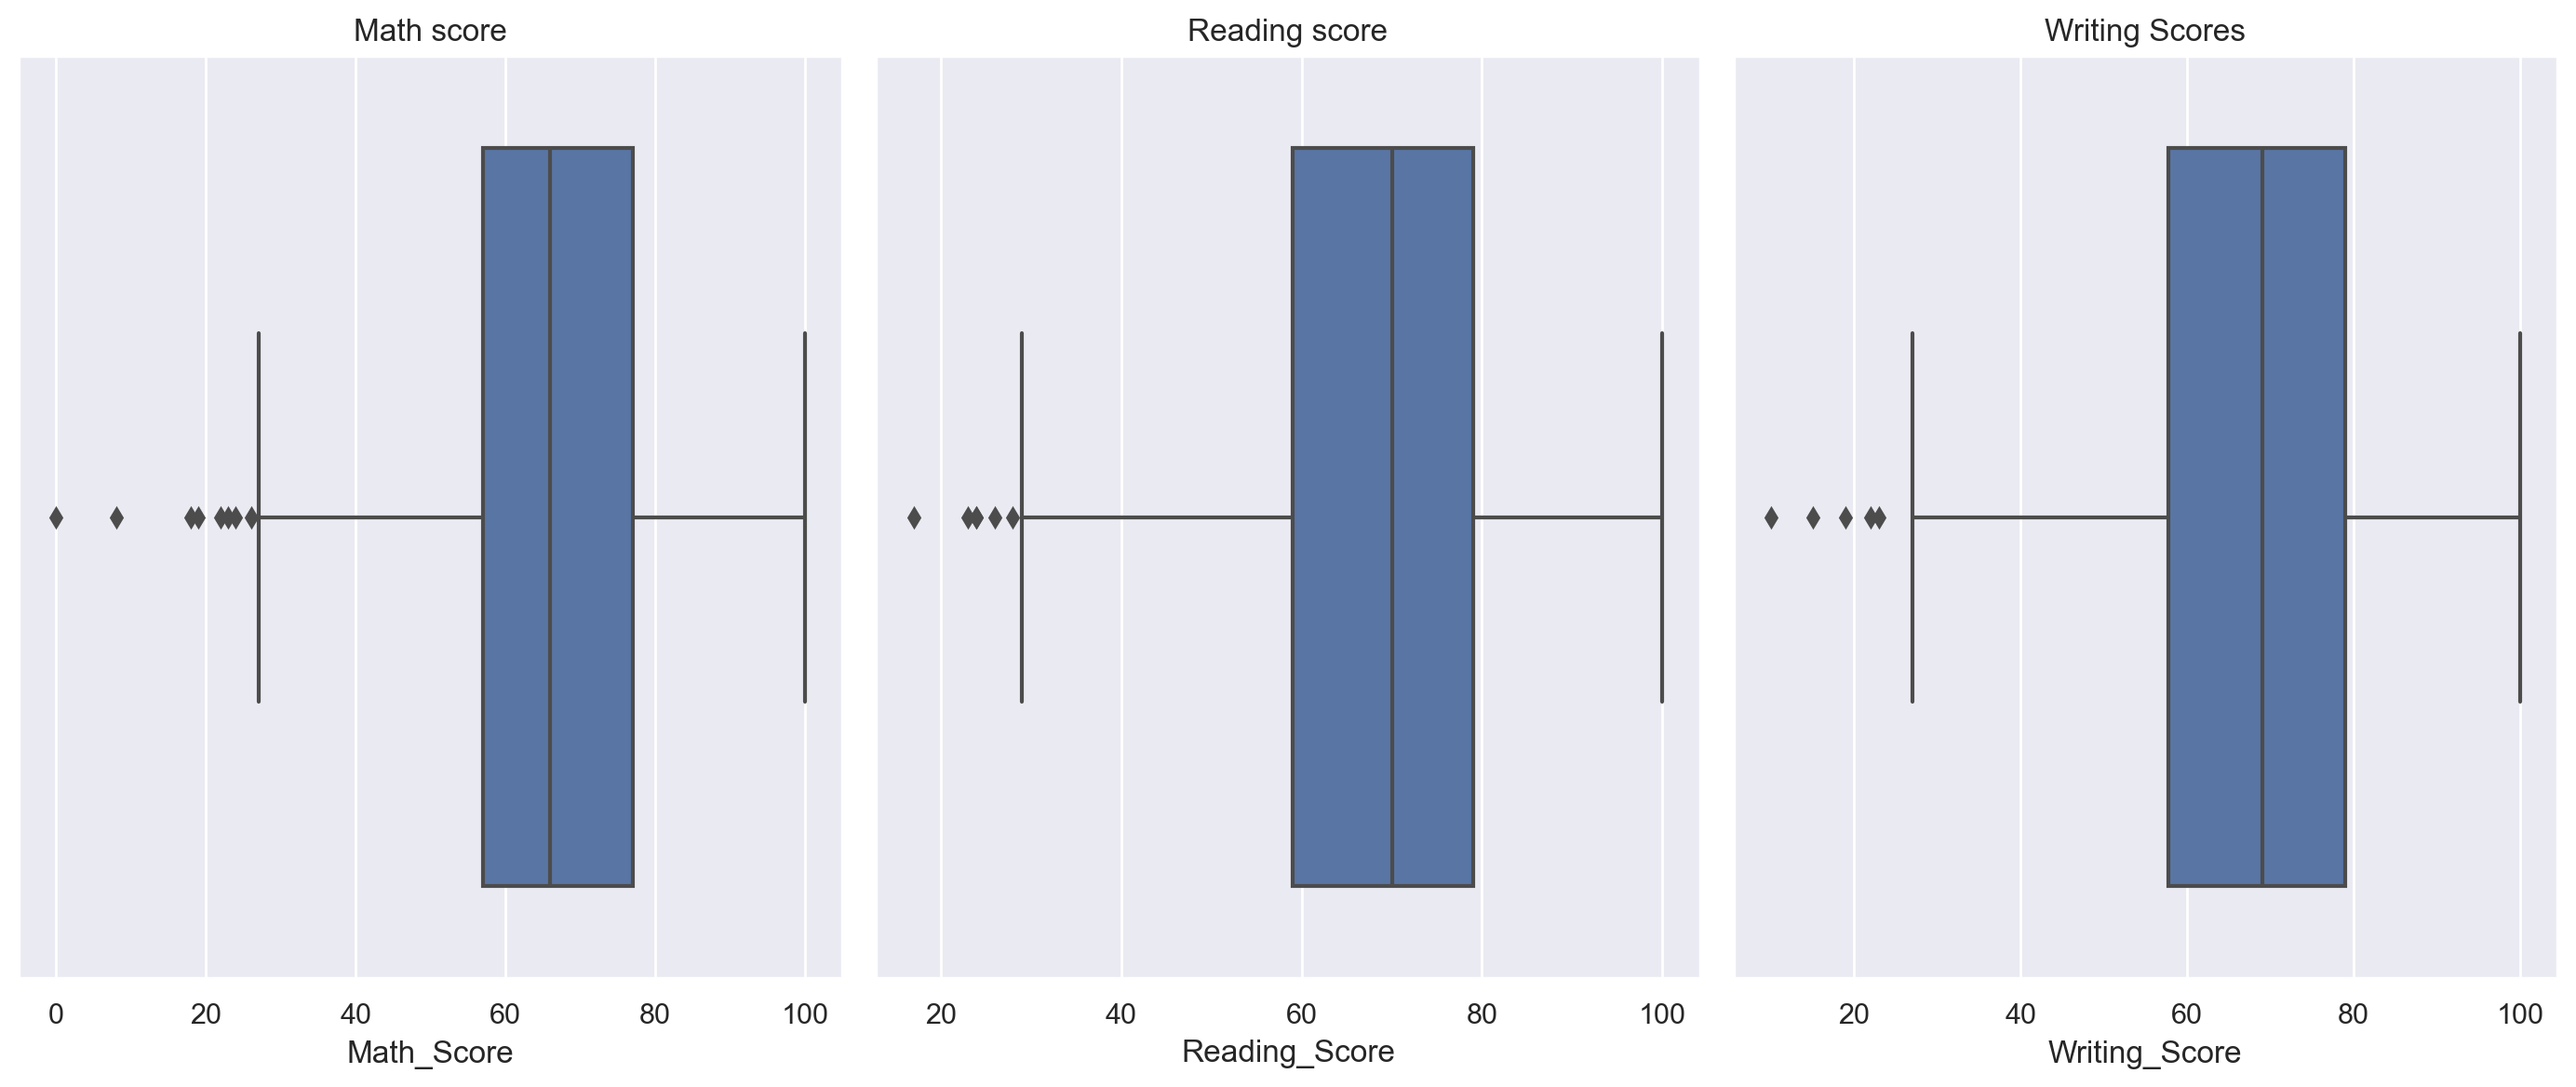

In [44]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x = 'Math_Score')
plt.title('Math score')
plt.tight_layout()


plt.subplot(1, 3, 2)
sns.boxplot(data=df, x = 'Reading_Score')
plt.title("Reading score")
plt.tight_layout()


plt.subplot(1, 3, 3)
sns.boxplot(data=df, x = 'Writing_Score')
plt.title("Writing Scores")
plt.tight_layout()

## Check gender performance of students that scored above 80%

In [48]:
Math_filtered = df.query('Math_Score> 80')
Reading_filtered = df.query('Reading_Score > 80')
Writing_filtered = df.query('Writing_Score > 80')

In [58]:
Math_stat = Math_filtered.groupby('Gender')['Math_Score'].count()
Reading_stat = Reading_filtered.groupby('Gender')['Reading_Score'].count()
Writing_stat = Writing_filtered.groupby('Gender')['Writing_Score'].count()

In [59]:
[Math_stat, Reading_stat, Writing_stat]

[Gender
 female     68
 male      108
 Name: Math_Score, dtype: int64,
 Gender
 female    159
 male       76
 Name: Reading_Score, dtype: int64,
 Gender
 female    154
 male       54
 Name: Writing_Score, dtype: int64]

In [57]:
df[df['Math_Score']>80].count()

Gender                         176
Race/Ethnicity                 176
Parental_Level_Of_Education    176
Lunch                          176
Test_Preparation_Course        176
Math_Score                     176
Reading_Score                  176
Writing_Score                  176
dtype: int64

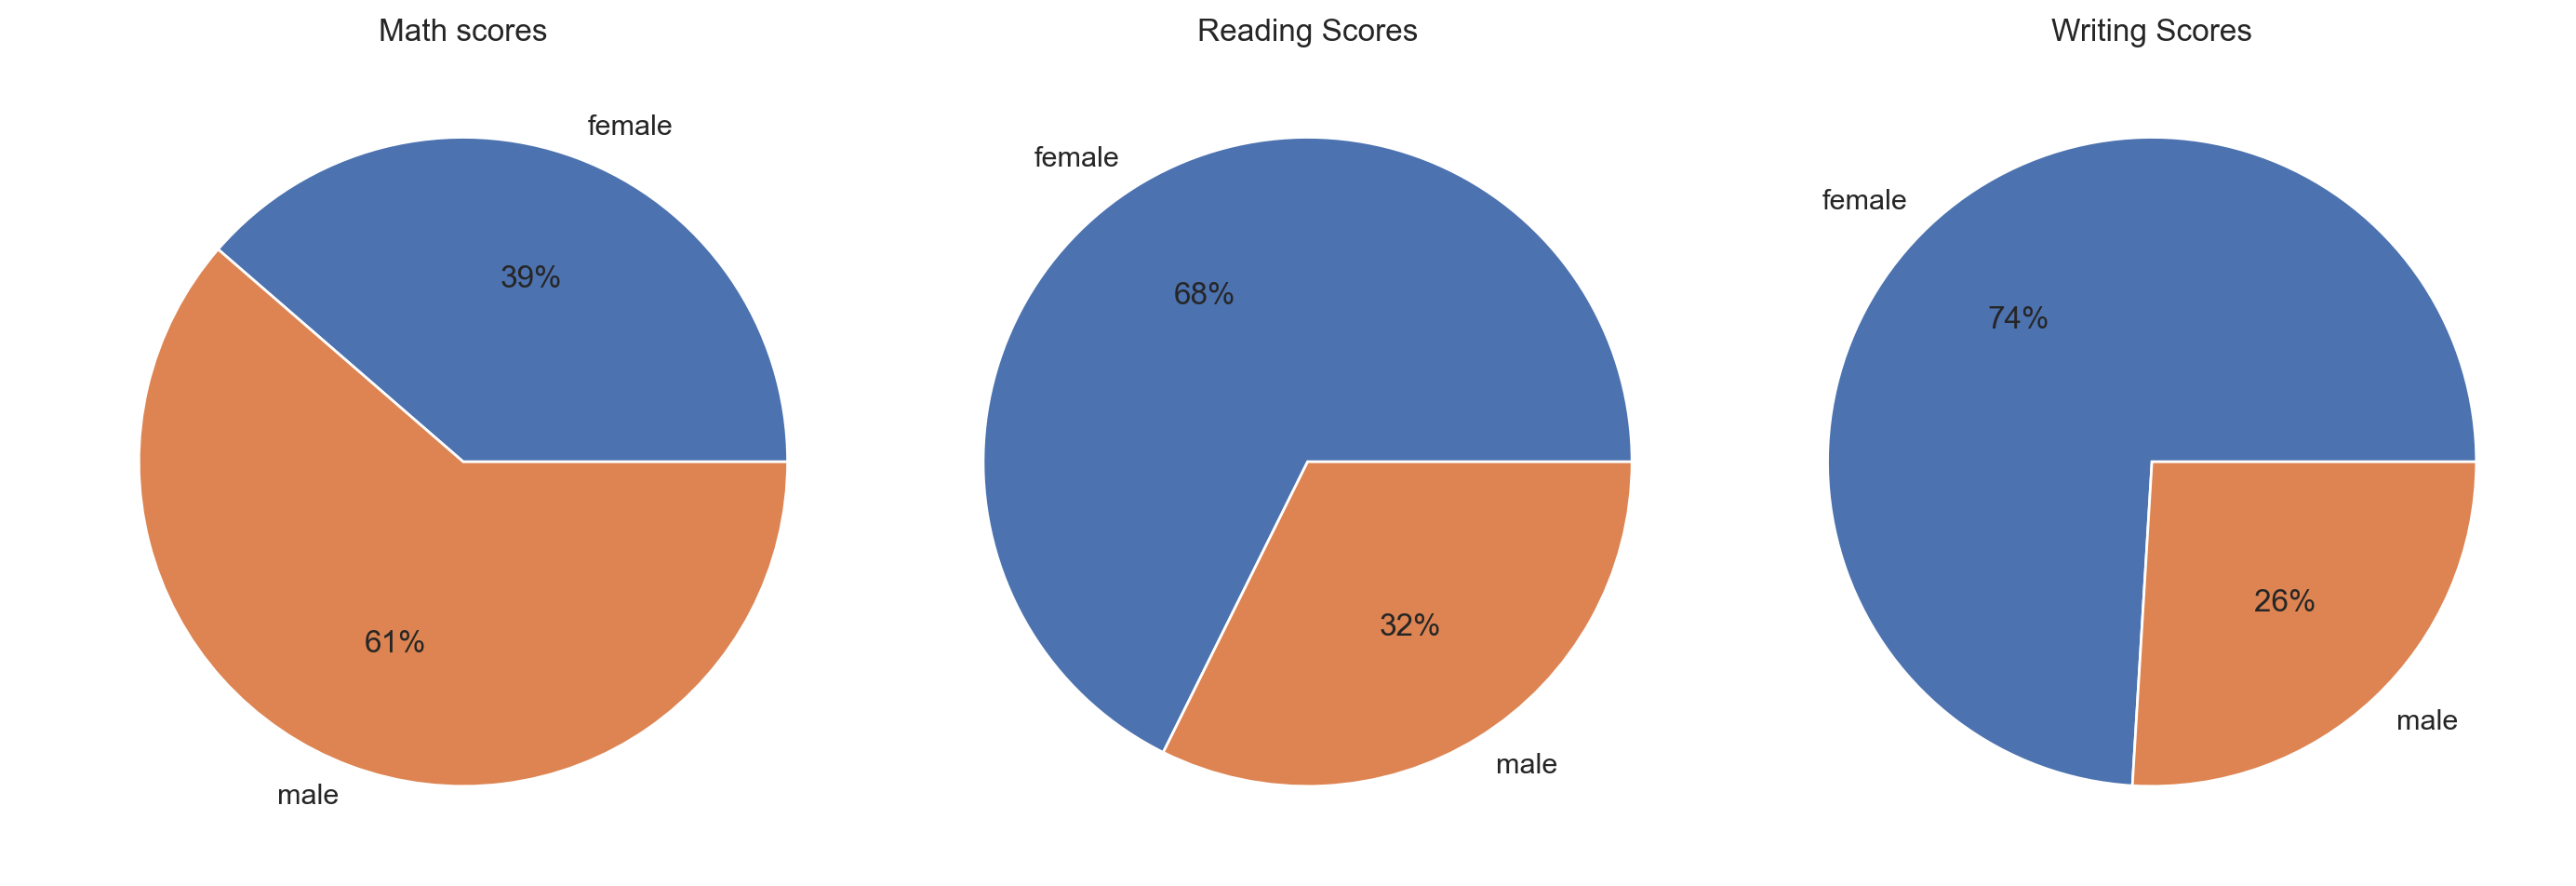

In [62]:
plt.figure(figsize=(14,6))

plt.subplot(1, 3, 1)
Math_stat.plot(kind='pie', autopct = "%.0f%%")
plt.title("Math scores")
plt.ylabel(" ")
plt.tight_layout()

plt.subplot(1, 3, 2)
Reading_stat.plot(kind='pie', autopct="%.0f%%")
plt.title("Reading Scores")
plt.ylabel('')
plt.tight_layout()

plt.subplot(1, 3, 3)
Writing_stat.plot(kind = 'pie', autopct="%.0f%%")
plt.title("Writing Scores")
plt.ylabel("")
plt.tight_layout()

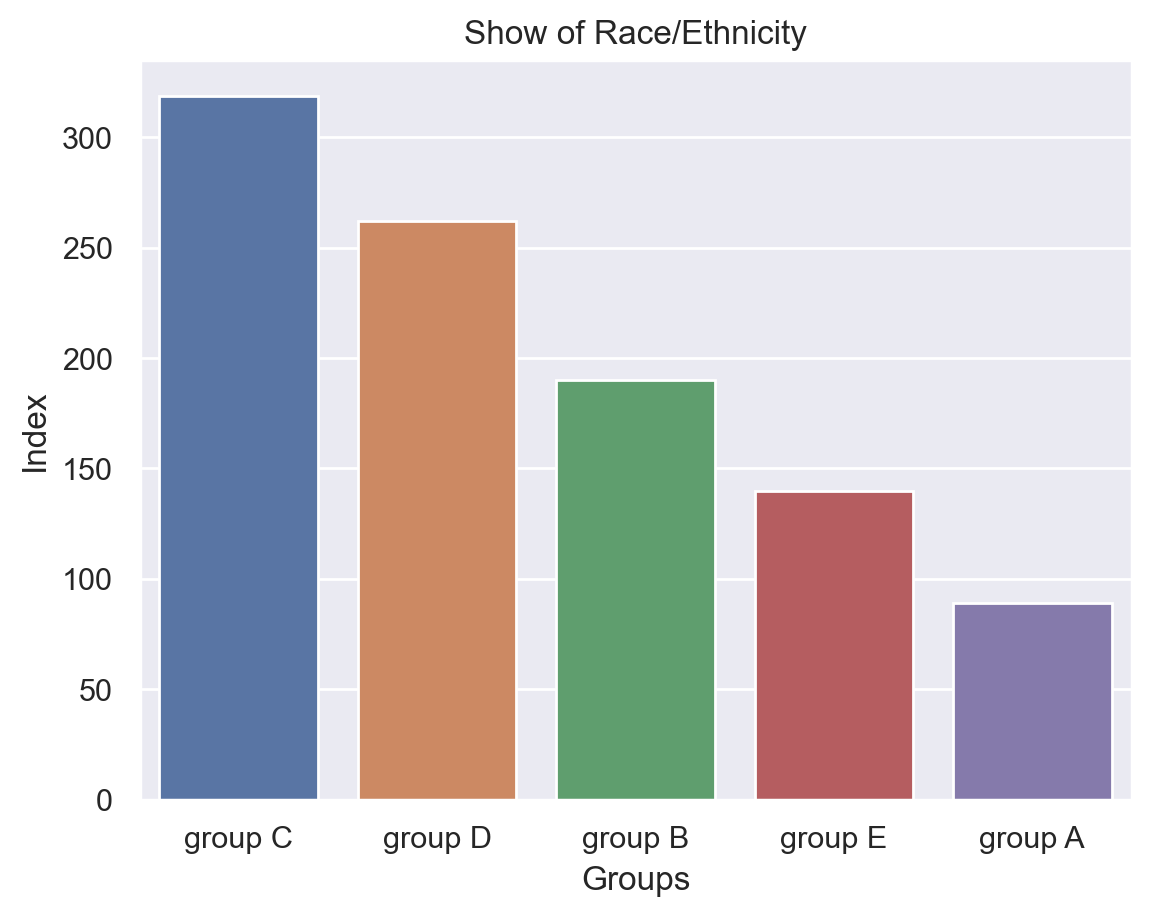

In [71]:
sns.barplot(x=df['Race/Ethnicity'].value_counts().index,
           y = df['Race/Ethnicity'].value_counts().values)

plt.title("Show of Race/Ethnicity")
plt.xlabel("Groups")
plt.ylabel("Index")
plt.show()